#CNN모델을 이용한 MNIST 데이터 셋 분류

In [3]:
!nvidia-smi

Thu Jul  1 06:16:22 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

##Input tensor, Target tensor 준비

In [6]:
(train_images,train_labels), (test_images,test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [8]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [9]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
train_labels[0]

5

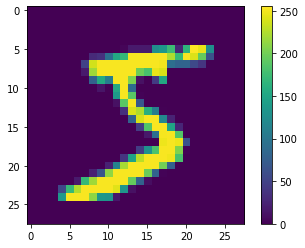

In [11]:
plt.figure()
plt.imshow(train_images[0].reshape(28,28))
plt.colorbar()
plt.grid(False)
plt.show()

##입력데이터 전처리

In [13]:
train_images = train_images/255.
test_images = test_images/255.


In [14]:
# MLP input_Data :1-D tensor
# convolution input_Data : 3-D tensor

In [15]:
train_images[0].shape #3-D로 만들기 위해 3차원 텐서로 리쉐입

(28, 28)

In [16]:
train_images = train_images.reshape((60000,28,28,1))
test_images = test_images.reshape((10000,28,28,1))

In [17]:
train_images.shape

(60000, 28, 28, 1)

In [18]:
test_images.shape

(10000, 28, 28, 1)

In [19]:
#labels 는 one-hot encoding 실행
from tensorflow.keras.utils import to_categorical

In [20]:
train_labels[0]

5

In [21]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [22]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

##CNN 모델 디자인

In [29]:
from tensorflow.keras import models, layers

In [30]:
model = models.Sequential()

In [ ]:
#input data : (28,28,1)
#feature extraction : convolution layer, pooling layer - 3D tensor input
#layer.Flatten() - 3D -> 1D
#classification : fully connected layer - 1D tensor 만 input 가능
#output data : (10, )

In [31]:
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

model.add(layers.Flatten())

model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)               

##모델의 학습 정보 설정

In [33]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

##모델에 input, target 데이터 연결 후 학습

In [35]:
model.fit(x=train_images, y=train_labels, epochs=15, batch_size=256, validation_split=0.2)

Epoch 1/15
188/188 [==============================] - 33s 10ms/step - loss: 0.3843 - accuracy: 0.8828 - val_loss: 0.1070 - val_accuracy: 0.9685
Epoch 2/15
188/188 [==============================] - 2s 9ms/step - loss: 0.0929 - accuracy: 0.9715 - val_loss: 0.0753 - val_accuracy: 0.9764
Epoch 3/15
188/188 [==============================] - 2s 8ms/step - loss: 0.0565 - accuracy: 0.9817 - val_loss: 0.0860 - val_accuracy: 0.9733
Epoch 4/15
188/188 [==============================] - 1s 8ms/step - loss: 0.0424 - accuracy: 0.9863 - val_loss: 0.0511 - val_accuracy: 0.9837
Epoch 5/15
188/188 [==============================] - 2s 9ms/step - loss: 0.0320 - accuracy: 0.9901 - val_loss: 0.0512 - val_accuracy: 0.9844
Epoch 6/15
188/188 [==============================] - 1s 8ms/step - loss: 0.0251 - accuracy: 0.9915 - val_loss: 0.0383 - val_accuracy: 0.9897
Epoch 7/15
188/188 [==============================] - 1s 8ms/step - loss: 0.0213 - accuracy: 0.9929 - val_loss: 0.0352 - val_accuracy: 0.9902
Epoc

##모델의 성능평가

In [36]:
test_loss, test_accuracy=model.evaluate(x=test_images,y=test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0290 - accuracy: 0.9931


##모델의 예측결과 확인

In [38]:
predict = model.predict(x=test_images[0].reshape((1,28,28,1)))

In [39]:
predict

array([[1.4813182e-16, 3.7510164e-12, 2.8538474e-11, 6.5422012e-10,
        4.1354856e-16, 9.0729976e-16, 1.2302143e-21, 1.0000000e+00,
        1.6405531e-11, 1.4483562e-09]], dtype=float32)

In [40]:
import numpy as np

In [41]:
np.argmax(predict)

7

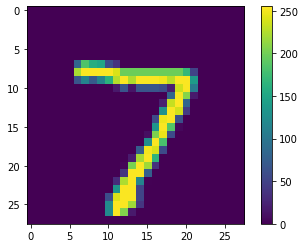

In [42]:
plt.figure()
plt.imshow(test_images[0].reshape(28,28)*255)
plt.colorbar()
plt.grid(False)
plt.show()